In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np
import corner
import ttvfast
from bounce import ttvfaststate
from bounce import driver
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
class Obs(object):
    def __init__(self, times, errors):
        self.times = times
        self.errors = errors

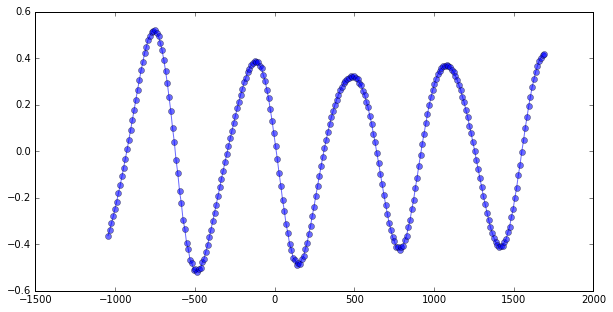

In [4]:
#Generating fake obs...
params_true_shifted = [
        0.00002878248, 10.9233301885, 0.0559950818813, 90.9205089025, 0.100354154645, 181.980514569, 90.4742591356,
        0.00061895914, 22.2663975745, 0.0567178996576, 92.4016920156, 0.462146380355, 1.65282682862, -108.441772505]
ttvfastsettings = [-1045-5.5, 0.54, 1697.9, 2, 0]
planet1 = ttvfast.models.Planet(*params_true_shifted[:7])
planet2 = ttvfast.models.Planet(*params_true_shifted[7:])
stellar_mass = 0.95573417954
planets = [planet1, planet2]            
#get results...
results = ttvfast.ttvfast(planets, stellar_mass, ttvfastsettings[0], ttvfastsettings[1], ttvfastsettings[2])
integer_indices, epochs, times, rsky, vsky = results["positions"]
t1_times = []
t2_times = []
count = 0
for i in range(len(times)):
    if(integer_indices[i]==0):
        if( not np.isclose(times[i],-2.0)):
            t1_times.append(times[i])
            count +=1
        else:
            break
    else:
        t2_times.append(times[i])
times_true = t1_times
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(*driver.ttv_from_times(times_true), alpha=0.58, color="blue", marker='o')

In [5]:
modified_times = np.asarray(times_true)+(np.random.normal(0,7.e-2))
error_model = np.ones(len(times_true))*7.e-2
obs = Obs(modified_times, error_model)
ttvs = ttvfaststate.TTVState(params_true_shifted, ttvfastsettings)

In [6]:
N_iterations = 4*14*1000
N_walkers = 4*14
label = "Simple_emcee_ttvtest"
scal = np.asarray([0.00002878248,
        1.0917340278625494e+01,
        5.6159310042858110e-02,
        2*np.pi,
        2*np.pi,
        2*np.pi,
        2*np.pi,
        0.00061895914,
        2.2266898036209028e+01,
        5.6691301931178648e-02,
        2*np.pi,
        2*np.pi,
        2*np.pi,
        2*np.pi])*(1.e-1)


emcee_ttvtest_bundle, run_hash = driver.run_emcee(label, 
                                  N_iterations,
                                  ttvs,
                                  obs,
                                  N_walkers,
                                  scal,
                                  a=2.,
                                  printing_every=250,
                                  listmode=True)

Progress: 0.1%, time: 2017-10-20 04:23:56.198413
Progress: 25.1%, time: 2017-10-20 04:26:29.159242
Progress: 50.1%, time: 2017-10-20 04:28:57.373812
Progress: 75.1%, time: 2017-10-20 04:31:13.583882
Error(s): 0
Acceptance rate: 24.029%
The id of the simulation is: 93a32470c38db643ed2ad107a4f37f34
The end time of the simulation is 2017-10-20 04:33:21.582978


In [7]:
%store emcee_ttvtest_bundle

Stored 'emcee_ttvtest_bundle' (McmcBundle)


# Can start from here if using saved bundle.

In [8]:
%store -r emcee_ttvtest_bundle
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from bounce import driver

Eliminated burn in, sampled every 1.
Begin plotting...
Selected some 100 samples to plot.
Resulting average params state (randomly sampledriver.ind):
[  2.80339716e-05   1.09228567e+01   5.54725160e-02   9.04424892e+01
   1.03128618e+00   1.82866710e+02   9.19169632e+01   6.25696737e-04
   2.22655127e+01   5.76212813e-02   9.18005756e+01   1.22387679e-01
   3.02671615e+00  -1.08434372e+02]


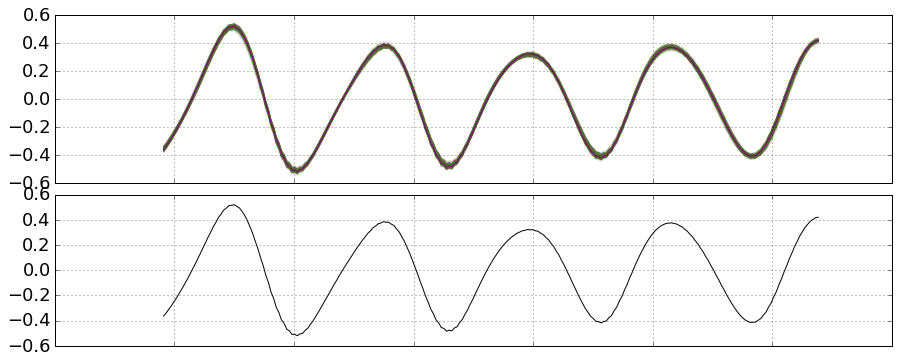

In [13]:
driver.plot_ttv_results(emcee_ttvtest_bundle, 100, [15,3])

In [10]:
corner_labels = ["m_0","P_0","e_0","i_0","Omega_0","omega_0","M_0",
                 "m_1","P_1","e_1","i_1","Omega_1","omega_1","M_1" ]

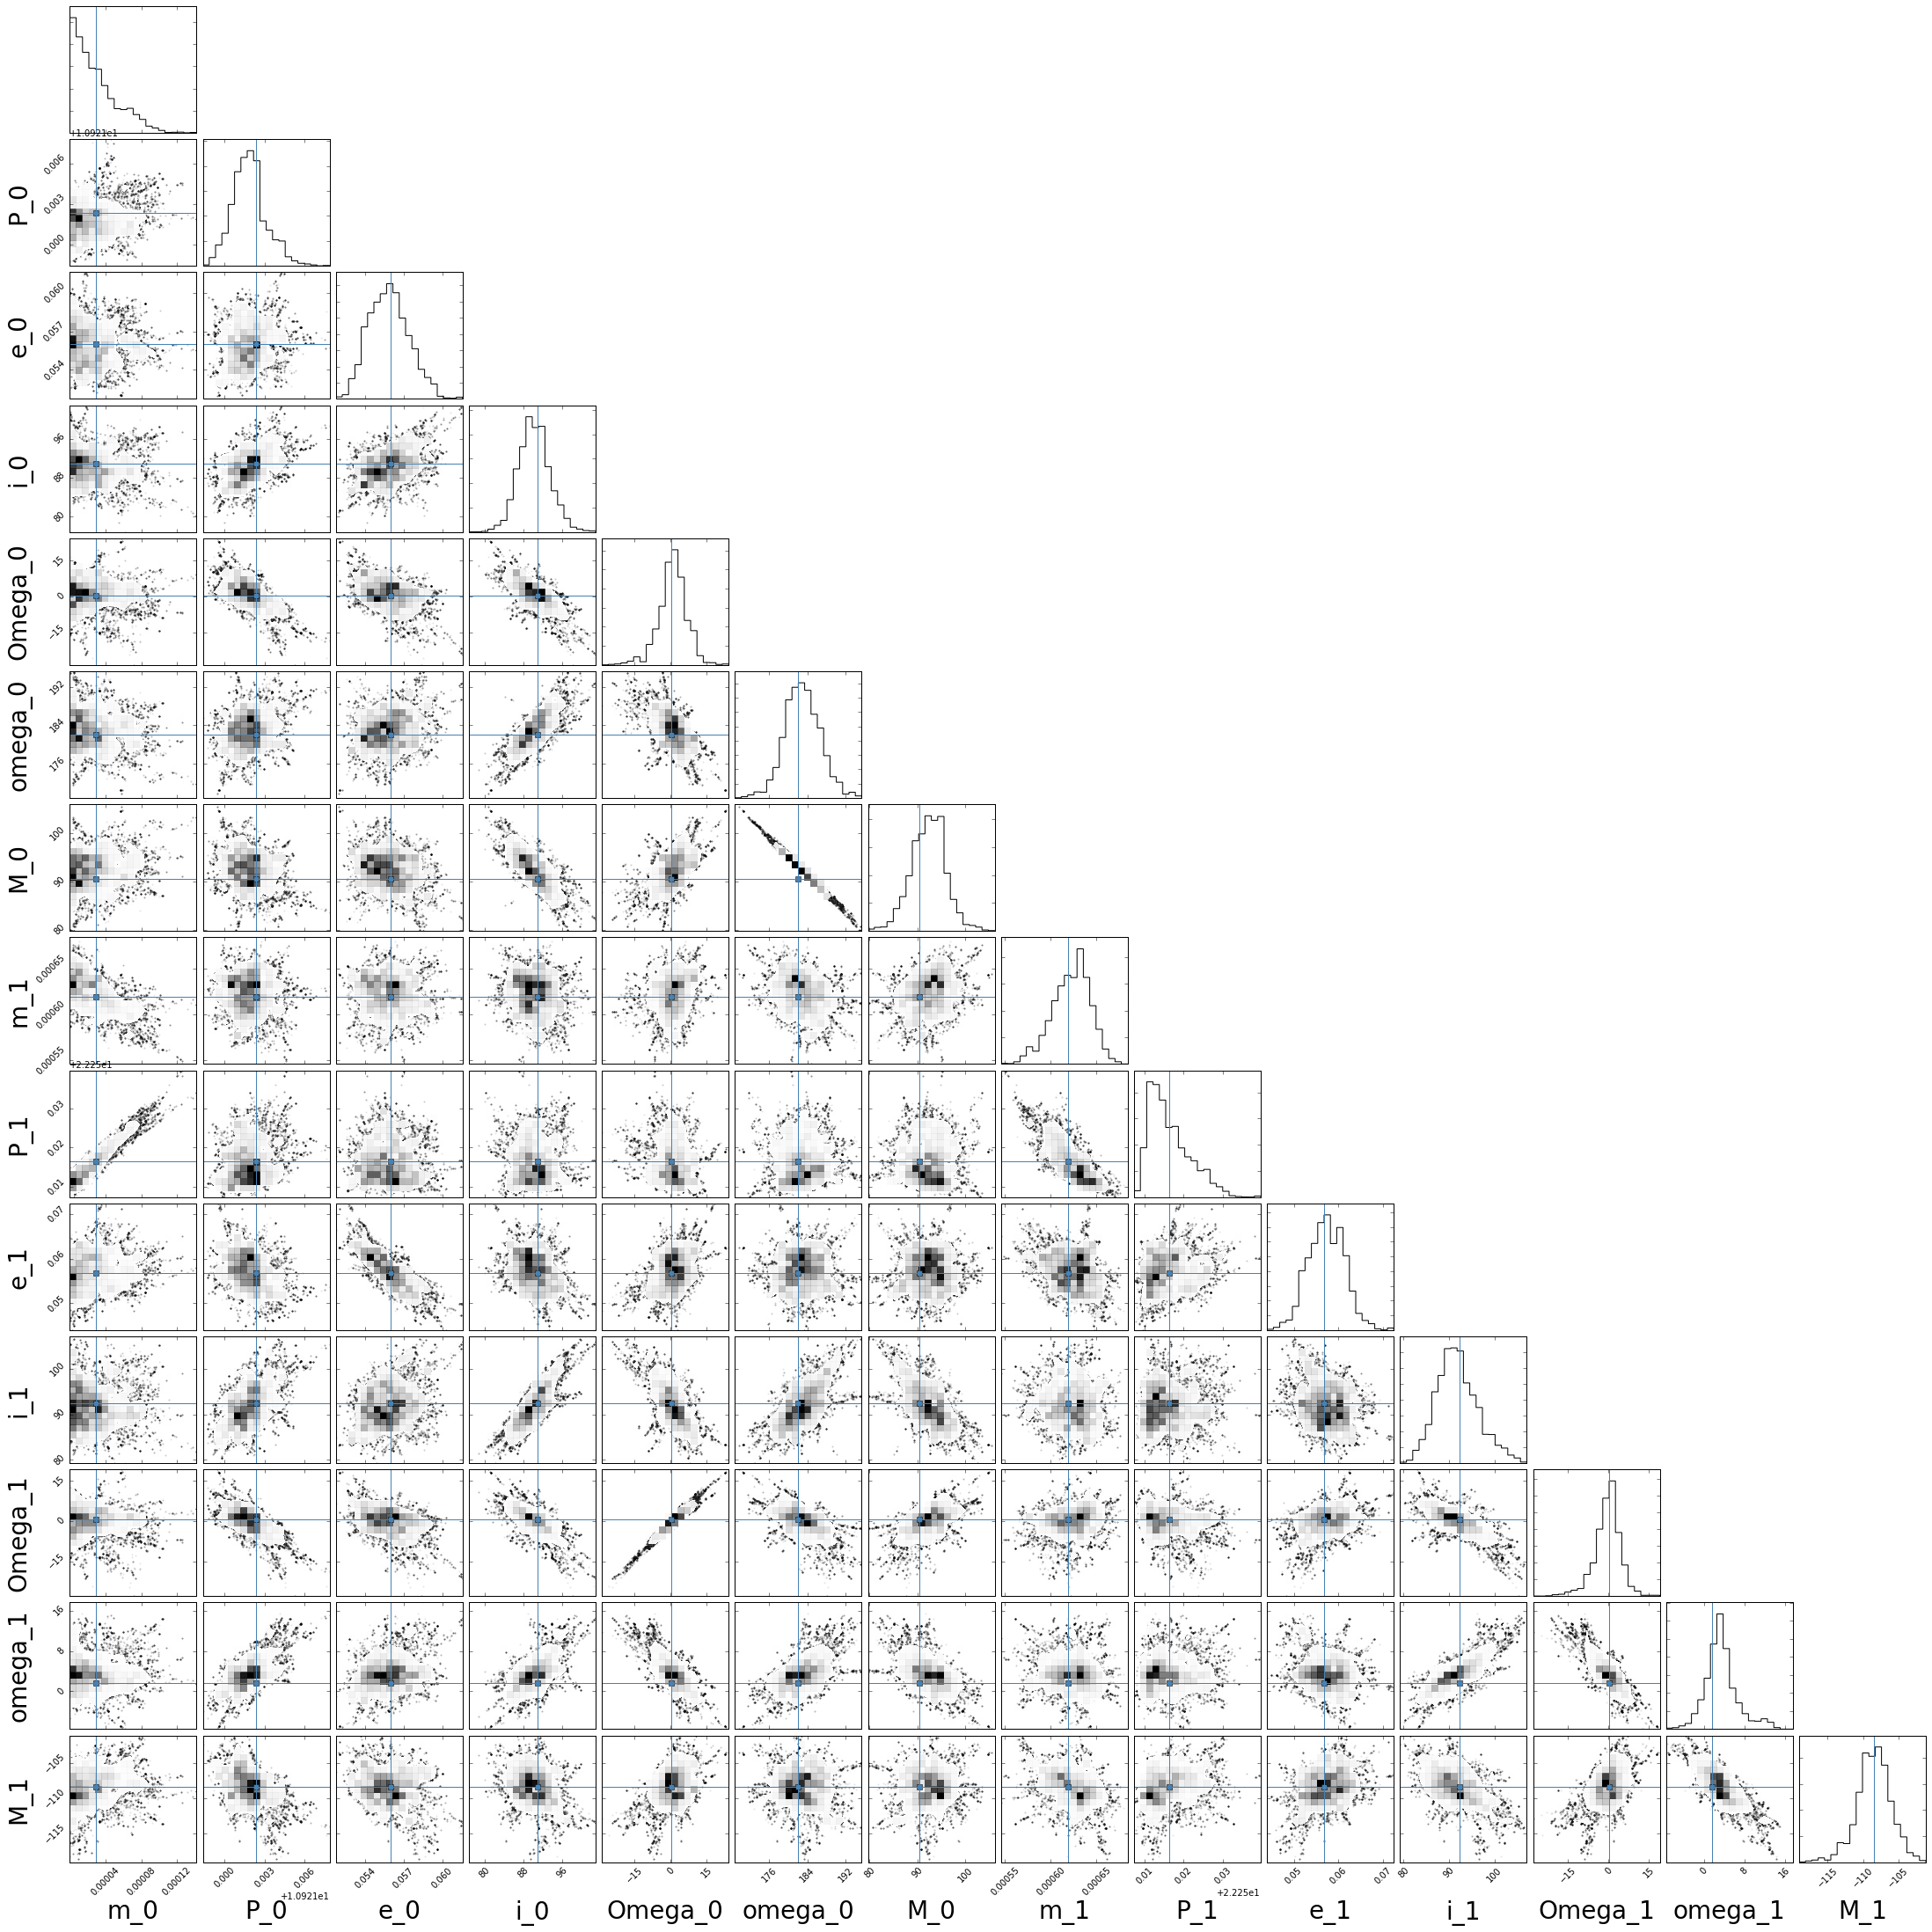

In [11]:
figure = corner.corner(emcee_ttvtest_bundle.mcmc_trimmedchain,
                       truths=params_true_shifted,
                       plot_contours=False,
                       labels=corner_labels,
                       label_kwargs={"fontsize":28},
                       max_n_ticks=4)